<a href="https://colab.research.google.com/github/UTA-PYTHON/3401/blob/main/AwoAbdillahi_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework Questions:**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('ClimateData.csv')

In [10]:
df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


##**1. Data Understanding and Summary:**

● Question: Summarize and describe the data type of each variable

In [ ]:
#id: Numeric (Integer) - Represents a unique identifier for each entry in the dataset. building_class: Categorical (String) - Represents the type or classification of the building (e.g., Commercial, Residential). floor_area: Numeric (Float) - Represents the total floor area of the building in square feet. year_built: Numeric (Float or Integer) - Represents the year the building was constructed. precipitation_inches: Numeric (Float) - Represents the amount of precipitation in inches. snowfall_inches: Numeric (Float) - Represents the amount of snowfall in inches. avg_temp: Numeric (Float) - Represents the average temperature. days_with_fog: Numeric (Float or Integer) - Represents the number of days with fog. site_eui: Numeric (Float) - Represents the Site Energy Use Intensity (EUI), typically measured in kilo-British thermal units per square foot (kBtu/sq. ft.).

##**2. Unique Values Analysis:**

● Question: For the categorical variable in the dataset, identify the number of unique
values.

In [11]:
unique_building_classes = df['building_class'].nunique()
print("Number of unique building classes:", unique_building_classes)

Number of unique building classes: 2


##**3. Descriptive Statistics:**

● Question: Examine and summarize the descriptive statistics for the dataset. What insights
can you gain about the central tendency and dispersion of each variable?

In [12]:
descriptive_stats = df.describe()
print(descriptive_stats)

                 id    floor_area    year_built  precipitation_inches  \
count  75757.000000  7.575700e+04  73920.000000          75757.000000   
mean   37878.000000  1.659839e+05   1952.306764             42.430651   
std    21869.306509  2.468758e+05     37.053619             10.592205   
min        0.000000  9.430000e+02      0.000000              0.000000   
25%    18939.000000  6.237900e+04   1927.000000             39.350000   
50%    37878.000000  9.136700e+04   1951.000000             42.170000   
75%    56817.000000  1.660000e+05   1977.000000             46.320000   
max    75756.000000  6.385382e+06   2015.000000            107.690000   

       snowfall_inches      avg_temp  days_with_fog      site_eui  
count     75757.000000  75757.000000   29961.000000  75757.000000  
mean         29.136379     56.176705     109.142051     82.584707  
std          17.810894      2.241940      50.699751     58.255413  
min           0.000000     44.512329      12.000000      1.000000  
25

#**4. Missing Values Assessment:**

● Question: Assess the dataset for missing values. Quantify the extent of missingness in
each column. How might these missing values affect your analysis?

In [13]:
missing_values_count = df.isnull().sum()
print("Missing values in each column:")
print(missing_values_count)

Missing values in each column:
id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64


#**5. Missing Data Handling:**

● Question: Based on your assessment of missing values, choose appropriate techniques to
handle them. Would you opt for imputation or removal? Justify your choice.

In [14]:
import pandas as pd

missing_values_count = df.isnull().sum()
print("Missing values in each column:")
print(missing_values_count)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_imputed = df.copy()
for column in numeric_columns:
    df_imputed[column].fillna(df[column].mean(), inplace=True)

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_imputed[column].fillna(df[column].mode()[0], inplace=True)

df_removed = df.dropna()

print("Shape before removal:", df.shape)
print("Shape after removal:", df_removed.shape)

Missing values in each column:
id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64
Shape before removal: (75757, 9)
Shape after removal: (29400, 9)


In [ ]:
#Extent of Missingness: If only a small proportion of values are missing in a particular column, imputation might be suitable. However, if a large portion of values is missing, removing those rows may be more appropriate. Impact on Analysis: Consider the importance of the variable with missing values in your analysis. If the variable is critical and removing missing values would significantly reduce the sample size or introduce bias, imputation may be preferred. On the other hand, if the variable is less crucial or removing missing values does not substantially affect the analysis, removal may be more appropriate. Nature of the Data: The characteristics of the data and the variables involved can also influence the choice. For instance, imputation may be more suitable for continuous variables where missing values can be reasonably estimated based on other available information. Categorical variables might also benefit from imputation if there are clear patterns in the data. However, for categorical variables with high cardinality or where imputation is less straightforward, removal might be preferred. Assumptions of Imputation Methods: If choosing imputation, consider the assumptions underlying the imputation method. For example, mean imputation assumes that the missing values are missing completely at random (MCAR) or missing at random (MAR), and it may introduce bias if these assumptions are not met. More sophisticated imputation methods like multiple imputation or predictive modeling may be preferred if these assumptions are violated. Analysis Goals and Context: Ultimately, the choice between imputation and removal should align with the goals of your analysis and the broader context. Consider the potential implications of each approach on the validity and interpretability of your results.

#**6. Duplicate Records:**

● Question: Identify and quantify any duplicate records in the dataset. What method will
you use to eliminate these duplicates, and why?

In [15]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate records:", duplicate_count)

df_cleaned = df.drop_duplicates()

print("Shape after removing duplicates:", df_cleaned.shape)

Number of duplicate records: 0
Shape after removing duplicates: (75757, 9)


#**7. Outlier Detection with Boxplots:**

● Question: Create boxplots for each variable to visually identify outliers. How will the
presence of outliers impact your analysis and how do you plan to address them?

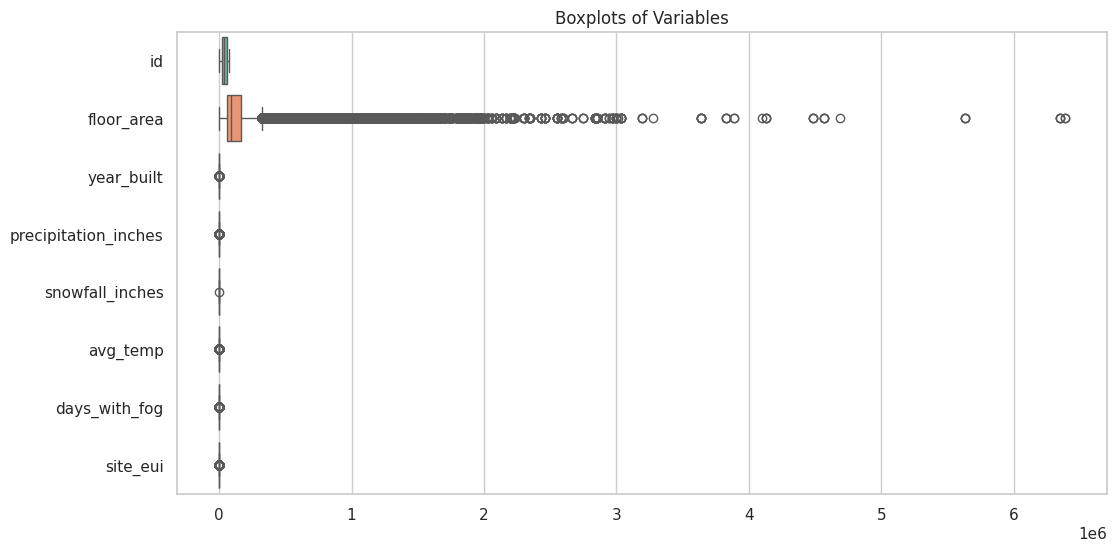

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Variables")
plt.show()

#**8. Histogram Analysis for Distribution:**

● Question: Generate histograms for each variable to examine their distributions. Are there
any noticeable patterns or outliers? How does the distribution shape affect your
preprocessing steps?

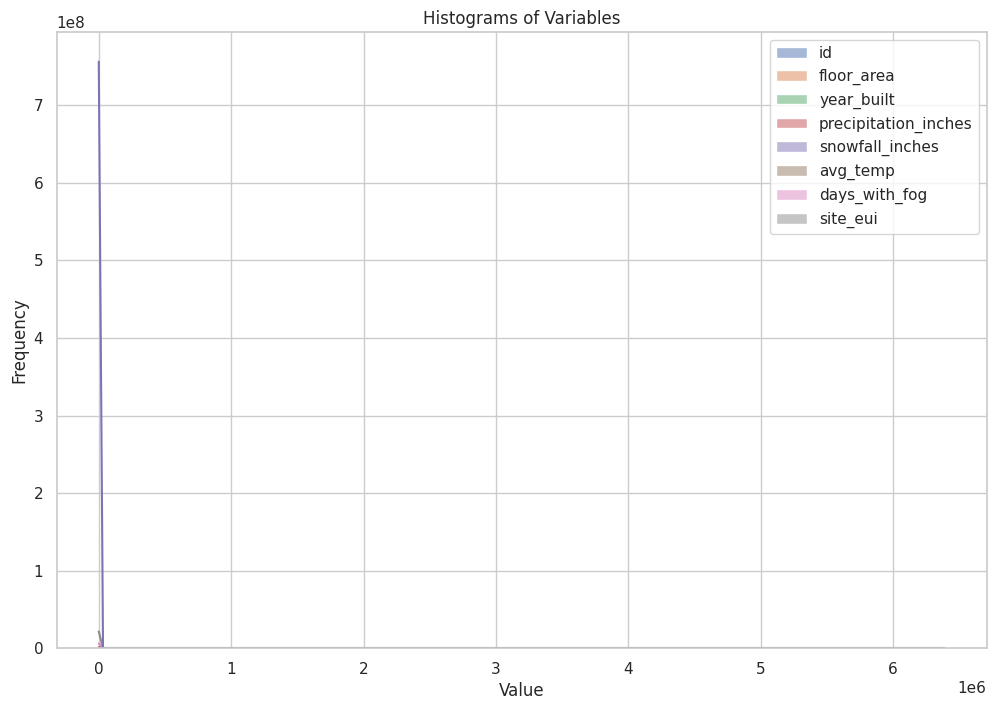

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.histplot(data=df, kde=True, bins=20)
plt.title("Histograms of Variables")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#**9. Feature Scaling:**

● Question: Do you need feature scaling in this dataset? Explain why

In [ ]:
#Feature scaling may be necessary in this dataset depending on the machine learning algorithms you plan to use and the characteristics of the variables. Some machine learning algorithms are sensitive to the scale of the input features. For example, distance-based algorithms like k-nearest neighbors (KNN) and support vector machines (SVM) are highly sensitive to feature scales. If features have vastly different scales, the algorithm might give more weight to features with larger scales, leading to biased results. Gradient descent-based algorithms, such as linear regression and neural networks, converge faster when features are scaled. Without scaling, the optimization process might take longer to reach the minimum loss or may not converge at all. Regularization techniques like Ridge and Lasso regression penalize large coefficients. Scaling features ensures that the regularization term treats all features equally, preventing bias towards features with larger scales. Clustering algorithms like k-means and hierarchical clustering use distance metrics to group similar data points. If features have different scales, the distance computation might be dominated by features with larger scales, leading to suboptimal clustering results.

#**10. Outlier Detection with Z-score:**

● Question: Use the Z-score method to detect outliers in the dataset. How will you decide
which outliers to handle and what strategies will you employ?

In [18]:
from scipy import stats

z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

threshold = 3

outliers = (abs(z_scores) > threshold).any(axis=1)

print("Indices of outliers:", df.index[outliers].tolist())

Indices of outliers: [13, 24, 26, 56, 93, 95, 108, 113, 124, 125, 144, 155, 161, 164, 170, 179, 201, 214, 245, 292, 306, 331, 334, 335, 337, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 415, 422, 427, 445, 452, 488, 510, 524, 546, 573, 589, 596, 597, 600, 602, 609, 649, 687, 691, 709, 777, 808, 851, 852, 853, 854, 868, 878, 888, 903, 904, 919, 923, 930, 944, 1011, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1049, 1053, 1054, 1055, 1056, 1057, 1058, 1061, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 11

In [ ]:
#When deciding which outliers to handle and selecting appropriate strategies, it's essential to consider the data's nature, context, and impact on the analysis. Understanding the data's distribution and the outliers' relevance to the problem at hand is crucial. Outliers that are likely to introduce bias or distort the interpretation of results may warrant handling, whereas outliers representing meaningful insights may be retained. Common strategies such as removal, winsorization, transformation, imputation, or model-based handling can be employed based on the assessment of outliers and their impact on the analysis. By systematically evaluating outlier handling strategies and their implications, informed decisions can be made to ensure the robustness and validity of the analysis or modeling results.

#**11. Range Analysis:**

● Question: Identify the maximum and minimum values for each variable. How do these
ranges inform your preprocessing and analysis?

In [19]:
max_values = df.max()

min_values = df.min()

print("Maximum values for each variable:")
print(max_values)
print("\nMinimum values for each variable:")
print(min_values)

Maximum values for each variable:
id                            75756
building_class          Residential
floor_area                6385382.0
year_built                   2015.0
precipitation_inches         107.69
snowfall_inches               127.3
avg_temp                  77.245205
days_with_fog                 311.0
site_eui                     997.87
dtype: object

Minimum values for each variable:
id                               0
building_class          Commercial
floor_area                   943.0
year_built                     0.0
precipitation_inches           0.0
snowfall_inches                0.0
avg_temp                 44.512329
days_with_fog                 12.0
site_eui                       1.0
dtype: object


In [ ]:
#Understanding the ranges of values for each variable in the dataset plays a crucial role in preprocessing and analysis. These ranges inform decisions regarding data scaling, outlier detection, imputation strategies, model interpretation, and feature engineering. By knowing the range of values, data scientists can appropriately scale features, detect outliers beyond expected thresholds, determine suitable imputation methods for missing data, interpret model coefficients, and make informed decisions about feature engineering techniques. Ultimately, considering the ranges of values ensures that preprocessing steps are tailored to the specific characteristics of the data, leading to more accurate and reliable analysis and modeling results.

#**12. Encoding Categorical Variables:**

● Question: Encode the categorical variable. Which method do you find most suitable for
your dataset and why?

In [20]:
df_encoded = pd.get_dummies(df, columns=['building_class'], drop_first=True)

In [ ]:
#For the categorical variable "building_class" in this dataset, One-Hot Encoding emerges as the most suitable method. With nominal categories like "Commercial" and "Residential," One-Hot Encoding effectively converts each category into binary dummy variables. This preserves the distinctness of each class without imposing any artificial order, critical for maintaining the integrity of the data. Moreover, the resulting orthogonal features facilitate accurate model training, ensuring that the machine learning algorithm can effectively distinguish between different building classes. Thus, One-Hot Encoding stands out as the preferred choice for preprocessing this categorical variable, optimizing it for subsequent analysis or modeling tasks.